<a href="https://colab.research.google.com/github/herfandinoviutami/ECRN-ConstellationsChallenge/blob/main/ECRN_ConstellationsChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital modulations with <img width="250" src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/1200px-Python_logo_and_wordmark.svg.png' />

##Challenge 👍 - Constellations diagrams 🎇

In the last **ECRN** meeting 👩‍🎓 this challenge was proposed by professor **Fary**.

In this challenge students investigates the impairments a generic **QAM** signal is undergoing by analyzing the **constellation diagram** obtained after receiving *N* symbols. The proposed constellation diagrams are shown in the next Figure.

## Purpose of this notebook
This google colab notebook contains the **Python 🐍** code needed for generating QAM symbols.

In addition, it explores different signal impairments that can be simulated using the corresponding functions.

It is intended to serve as a collaboration tool 🔨 to face the challenges and helps students to develop a base code for future research.

Feel free to leave any **comments**, **contributions**, **suggestions**, **considerations** and **revisions**. They are more than welcome, and they will be helpful to develop this shared tool.

## How to work with google colab
If you are not familiar with google colab notebooks please check this [link](https://colab.research.google.com/?utm_source=scs-index)

## Caution:
There can be mistakes that must be corrected. Feel free to improve the code and leave any comments within the code with your contributions, suggestions and considerations. If you have any problem contact me at cristo.jv.dev@gmail.com
as my university e-mail provider is not working correctly.

# Contributions:
> **Spoiler alert**: Below are the solutions detailed for this challenge.

These are the impairments simulated:
- Ideal [Constellation diagram 1]
- AWGN added to the signal [Constellation diagram 4]
- Phase noise (Rx oscillator jitter) [Constellation diagram 2]
- I/Q imbalance (Gain mismatch) [Constellation diagram 5]
- I/Q imbalance (Phase mismatch - cross talking) [Constellation diagram 6]

**Important:** the Non-linearity impairment corresponding to the [Constellation diagram 3] has non been developed. Please help 😜!

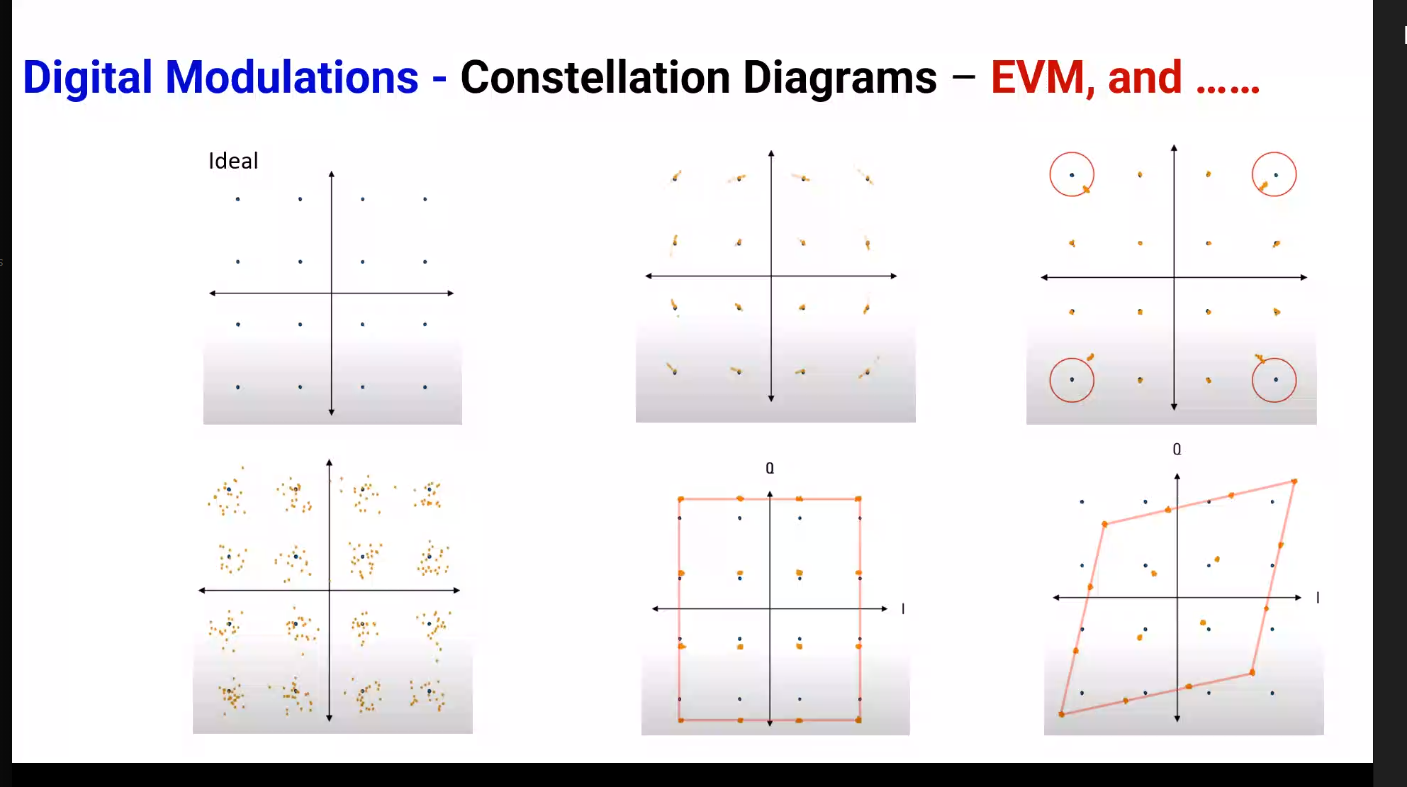

# Imports
Import the necessary Python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_symbols(symbols, title):
  fig, axs = plt.subplots(1,1)
  axs.plot(np.real(symbols), np.imag(symbols), 'o')
  axs.set_title(title)
  axs.set_xlabel('I'); axs.set_ylabel('Q')
  axs.grid(True)
  plt.show()

def plot_symbols_with_ideal_comparison(symbols, ideal, title):
  fig, axs = plt.subplots(1,1)
  axs.plot(np.real(symbols), np.imag(symbols), 'o', label='received')
  axs.plot(np.real(ideal), np.imag(ideal), 'o', label='ideal')
  axs.set_title(title)
  axs.set_xlabel('I'); axs.set_ylabel('Q')
  axs.grid(True)
  axs.legend()
  plt.show()

#The Rectangular Quadrature Amplitude Modulation (QAM)

In this section it is detailed the generation of rectangular QAM symbols.

## Encoding with Look-Up-Table (LUT) - Gray codes
In any M-QAM constellation, the adjacent symbols in the tx constellation should not differ by more than one bit.

To achieve this the input symbols (bit chains) must be converted into Gray coded symbols and then mapped to the desired QAM constellation symbol.

To do so, it is possible to use a Look-Up-Table (LUT) approach.

For the precoding algorithm, we will rely on Karnaugh Maps to generate the LUT of dimension N x N (where N = sqrt(M)) for the Gray coded M-QAM which is rectangular and symmetric (M = 4, 16, 64, 256).

To generate the Gray code we can travel through the Karnaugh map following the iteration shown in the next figure.

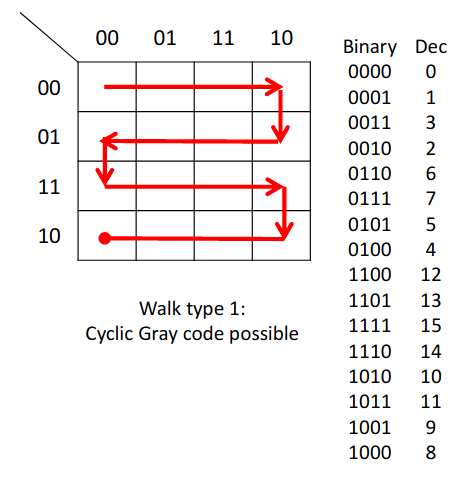

## Constellation mapping
The generation of any rectangular QAM constellation is equivalent to superimposing two PAM signals on quadrature carriers. For example, 16-QAM constellation points can be generated from two 4-PAM signals (64-QAM with two 8-PAM).
The generic equation to generate PAM signals of dimension D is:
<div href="https://www.codecogs.com/eqnedit.php?latex=A_d&space;=&space;2d&space;&plus;&space;1&space;-&space;D\\&space;where&space;\&space;d&space;=0,1,...,D-1" target="_blank"><img src="https://latex.codecogs.com/gif.latex?A_d&space;=&space;2d&space;&plus;&space;1&space;-&space;D\\&space;where&space;\&space;d&space;=0,1,...,D-1" title="A_d = 2d + 1 - D\\ where \ d =0,1,...,D-1" /></div>

Karnaugh map: 
[[ 0  1  3  2]
 [ 6  7  5  4]
 [12 13 15 14]
 [10 11  9  8]] 


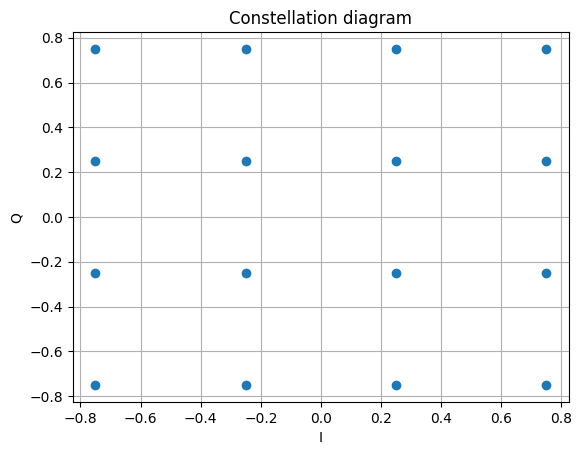

In [2]:
M = 16 # Modulation order

if (M == 1) or (np.mod(np.log2(M),2)!=0):
  # The modulation order is not a even power of 2 (4, 16, 64)
  raise ValueError("[ERROR]: The modulation order is not a even power of 2")

# Generate Look-Up-Table (LUT)

# 1) Input symbols
n_in = np.arange(0, M) # Sequential address from 0 to M - 1

# Note: the python operators used ^ and >> are the XOR and the signed right shift
# operators.
# ^: Sets each bit to 1 if only one of two bits is 1
# >>: Shift right by pushing copies of the leftmost bit in from the left, and let
# the rightmost bits fall off

# 2) Input symbols -> Gray code
a = np.asarray([x^(x>>1) for x in n_in])
D = np.sqrt(M).astype(int) # Dimension of K-map - NxN matrix

# 3) Karnaugh Map
a = np.reshape(a, (D,D))
print("Karnaugh map: \n{} ".format(a))
odd_rows = np.arange(start=1, stop=D,step=2) # identify alternate rows
n_gray = np.reshape(a, (M))

(x, y) = np.divmod(n_gray, D) # Returns the elemnt-wise quotient and remainder simultaneously.

Ax = 2*x+1-D
Ay = 2*y+1-D
Ax = Ax/D
Ay = Ay/D

# 4) LUT
constellation_lut = Ax + 1j*Ay

plot_symbols(constellation_lut, 'Constellation diagram')

# The ideal constellation
In this section 1000 bit chains are modulated using the LUT.
Then the tx symbols are displayed in a constellation diagram.

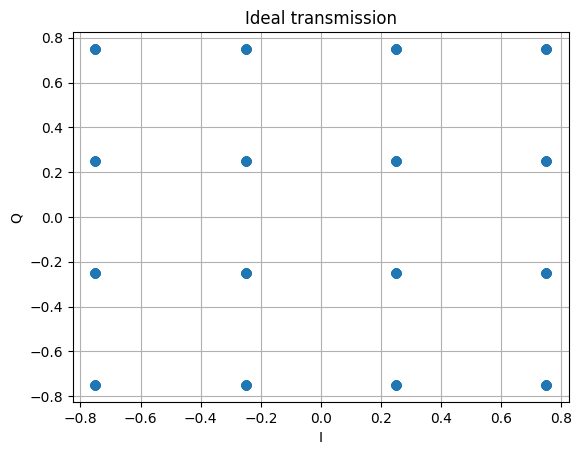

In [3]:
num_symbols = 1000

random_symbols = np.random.randint(M, size=num_symbols)
result = constellation_lut[random_symbols]

plot_symbols(result, "Ideal transmission")

# Impairment AWGN

In this section, AWGN is added to the symbols vector according to the signal power level.

Note: The awgn function is defined.

Complex object


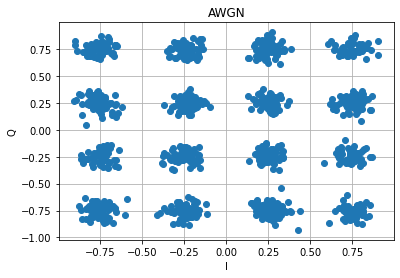

In [ ]:
def awgn(x, SNRdB):
  """ Add AWGN to signal 
  
  This functions adds AWGN to the input x.

  Parameters:
    x: input vector
    SNRdB: signal to noise ratio (in dBs)
  """

  snr = 10**(SNRdB/10)
  P = sum(abs(x)**2)/len(x) # Works on single dimensional vectors.
  N0 = P/SNRdB
  if np.isrealobj(x):
    print("Real object")
    n = np.sqrt(N0/2)*np.random.standard_normal(x.shape)
  else:
    print("Complex object")
    n = np.sqrt(N0/2)*(np.random.standard_normal(x.shape)+1j*np.random.standard_normal(x.shape))
  return x + n

result_awgn = awgn(result, 100)
plot_symbols(result_awgn, "AWGN")

# Impairment Phase noise (Jitter)
When the receiver has a noticeable jitter within the local oscillator (LO) the received phase is affected by noise. In this section, the noise is consider to be AWGN but it is not true.

###Which noise model could be used for modelling the jitter effect in sampling?

Complex object


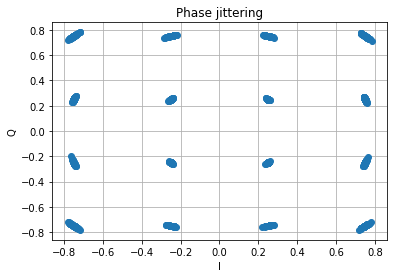

In [ ]:
def impairment_phase_noise(x, SNRdB):
  """ Add Phase AWGN noise to signal 
  
  This functions adds AWGN to the input x's phase.

  Parameters:
    x: input vector
    SNRdB: signal to noise ratio (in dBs)
  
  """

  snr = 10**(SNRdB/10)
  P = sum(abs(x)**2)/len(x)
  N0 = P/SNRdB
  
  if np.isrealobj(x):
    print("Real object")
    pass
  else:
    print("Complex object")
  x = x * np.exp(np.sqrt(N0/2)*1j*np.random.standard_normal(x.shape))
  return x

result_impairment_phase_noise = impairment_phase_noise(result, 1000)
plot_symbols(result_impairment_phase_noise, "Phase jittering")

# Impairment Gain mismatch between I, Q branches

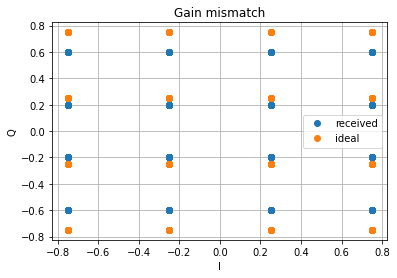

In [ ]:
def impairment_gain_mismatch(x, gain):
  Ri = np.real(x)
  Rq = np.imag(x)

  Zi = Ri
  Zq = gain*(Rq)

  return Zi + 1j*Zq

result_gain_mismatch = impairment_gain_mismatch(result, 0.8)
plot_symbols_with_ideal_comparison(result_gain_mismatch, result, "Gain mismatch")

# Impairment Phase mismatch between I, Q branches (Cross-talking)

The presence of phase mismatch in the local oscillator outputs manifests as cross-talk between the I and Q branches.

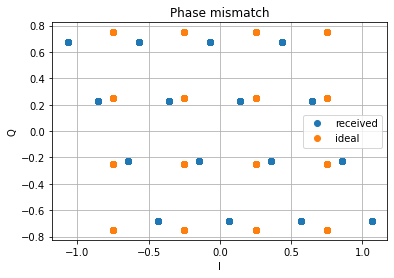

In [ ]:
def impairment_phase_mismatch(x, gain, phase_mismatch):
  Ri = np.real(x)
  Rq = np.imag(x)

  Zi = Ri - Rq*np.sin(phase_mismatch/180*np.pi)
  Zq = Rq * np.cos(phase_mismatch/180*np.pi)

  return Zi + 1j*Zq

result_phase_mismatch = impairment_phase_mismatch(result, 1, 25)
plot_symbols_with_ideal_comparison(result_phase_mismatch, result, "Phase mismatch")

# Impairment combined previous impairments

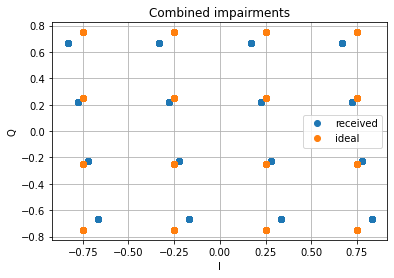

In [ ]:
def impairment_combined(x, gain, phase_mismatch):
  Ri = np.real(x)
  Rq = np.imag(x)

  Zi = Ri - gain*Rq*np.sin(phase_mismatch/180*np.pi)
  Zq = Rq * gain*np.cos(phase_mismatch/180*np.pi)

  return Zi + 1j*Zq

result_impairment_combined = impairment_combined(result, 0.9, 7)
plot_symbols_with_ideal_comparison(result_impairment_combined, result, "Combined impairments")

# Impairment Amplifier Non-linearities

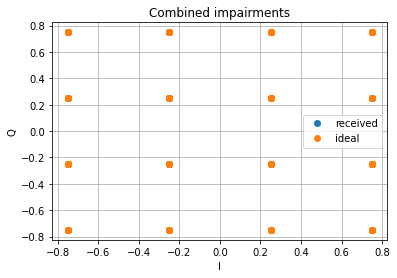

In [ ]:
def impairment_non_linearity(x, power_amplitude):
  Ri = np.real(x)
  Rq = np.imag(x)

  # Please add the code corresponding to the non-linearity behaviour of the amplifiers
  return Ri + 1j * Rq

result_impairment_non_linearity = impairment_non_linearity(result, 2)
plot_symbols_with_ideal_comparison(result_impairment_non_linearity, result, "Combined impairments")